In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
from sympy.solvers.solveset import linsolve, nonlinsolve
import matplotlib.pyplot as plt

In [2]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

In [3]:
the1, the2, phi1, phi2 = smp.symbols(r'\theta_1, \theta_2 \phi_1 \phi_2', cls=smp.Function)

In [4]:
the1 = the1(t)
the2 = the2(t)
phi1 = phi1(t)
phi2 = phi2(t)


In [5]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

phi2_dd

Derivative(\phi_2(t), (t, 2))

In [6]:
x1 = L1*smp.sin(the1)*smp.cos(phi1)
y1 = L1*smp.sin(the1)*smp.sin(phi1)
z1 = -L1*smp.cos(the1)
x2 = x1 + L2*smp.sin(the2)*smp.cos(phi2)
y2 = y1 + L2*smp.sin(the2)*smp.sin(phi2)
z2 = z1 -L2*smp.cos(the2)

In [7]:
x1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z1)
x2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z2)

In [8]:
# Kinetic
T1 = smp.Rational(1,2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(z1, t)**2)
T2 = smp.Rational(1,2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2 + smp.diff(z2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*z1
V2 = m2*g*z2
V = V1 + V2
# Lagrangian
L = T-V

In [9]:
LE1 = smp.diff(smp.diff(L, the1_d), t) - smp.diff(L, the1).simplify()
LE2 = smp.diff(smp.diff(L, the2_d), t) - smp.diff(L, the2).simplify()
LE3 = smp.diff(smp.diff(L, phi1_d), t) - smp.diff(L, phi1).simplify()
LE4 = smp.diff(smp.diff(L, phi2_d), t) - smp.diff(L, phi2).simplify()

In [10]:
sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, phi1_dd, phi2_dd),
                simplify=False, rational=False)

In [25]:
sols

{Derivative(\theta_1(t), (t, 2)): ((2*L2**2*sin(\phi_2(t))**2*sin(\theta_2(t))**2 + 2*L2**2*sin(\theta_2(t))**2*cos(\phi_2(t))**2)*(-2*L1*L2*sin(\phi_1(t))*sin(\theta_1(t))*cos(\phi_2(t))*cos(\theta_2(t)) + 2*L1*L2*sin(\phi_2(t))*sin(\theta_1(t))*cos(\phi_1(t))*cos(\theta_2(t)))*(4*L1*L2*m2*sin(\phi_1(t))*sin(\phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t)) + 4*L1*L2*m2*sin(\theta_1(t))*sin(\theta_2(t)) + 4*L1*L2*m2*cos(\phi_1(t))*cos(\phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t))) + (2*L1*L2*sin(\phi_1(t))*sin(\phi_2(t))*sin(\theta_1(t))*sin(\theta_2(t)) + 2*L1*L2*sin(\theta_1(t))*sin(\theta_2(t))*cos(\phi_1(t))*cos(\phi_2(t)))*(4*L1*L2*m2*sin(\phi_1(t))*sin(\theta_2(t))*cos(\phi_2(t))*cos(\theta_1(t)) - 4*L1*L2*m2*sin(\phi_2(t))*sin(\theta_2(t))*cos(\phi_1(t))*cos(\theta_1(t)))*(2*L2**2*sin(\phi_2(t))**2*cos(\theta_2(t))**2 + 2*L2**2*sin(\theta_2(t))**2 + 2*L2**2*cos(\phi_2(t))**2*cos(\theta_2(t))**2))*(-4*L1**2*m1*sin(\phi_1(t))**2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t

In [11]:
do1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[the1_dd])
do2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[phi1_dd])
dw2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[phi2_dd])
dphi1dt_f = smp.lambdify(phi1_d, phi1_d)
dphi2dt_f = smp.lambdify(phi2_d, phi2_d)

In [12]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, the2, phi1, phi2, o1, o2, w1, w2 = S
    return [
        dthe1dt_f(o1),
        dthe2dt_f(o2),
        dphi1dt_f(w1),
        dphi2dt_f(w2),
        do1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        do2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
    ]

In [13]:
tend = 10
t = np.linspace(0, tend, tend*1000)
g = 9.81
m1=2
m2=1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[np.pi/2, np.pi/2, 0, 0, 0, 0, 0, 0], t=t, args=(g,m1,m2,L1,L2))

In [14]:
ans2 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 0, 0, -2, -10], t=t, args=(g,m1,m2,L1,L2))

In [15]:
ans3 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 10, 0, 0], t=t, args=(g,m1,m2,L1,L2))

C:\Users\alizhan\AppData\Local\Temp\ipykernel_6008\2350449632.py:1: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  ans3 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 10, 0, 0], t=t, args=(g,m1,m2,L1,L2))


In [16]:
ans.shape
theta1 = ans.T[0]*180/np.pi
theta2 = ans.T[1]*180/np.pi
phi1_ans = ans.T[2]*180/np.pi
phi2_ans = ans.T[3]*180/np.pi
theta1_d = ans.T[4]
theta2_d = ans.T[5]
phi1_d_ans = ans.T[6]
phi_d_ans = ans.T[7]


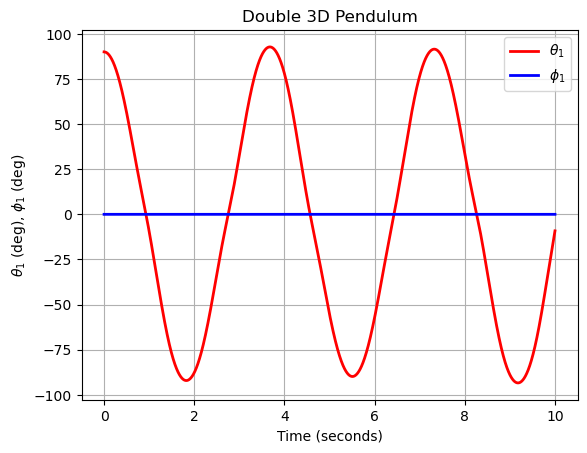

In [17]:
plt.plot(t,  theta1, 'r', lw=2, label=r'$\theta_1$')
plt.plot(t, phi1_ans, 'b', lw=2, label=r'$\phi_1$') 
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta_1$ (deg), $\phi_1$ (deg)')
plt.grid()
plt.show()

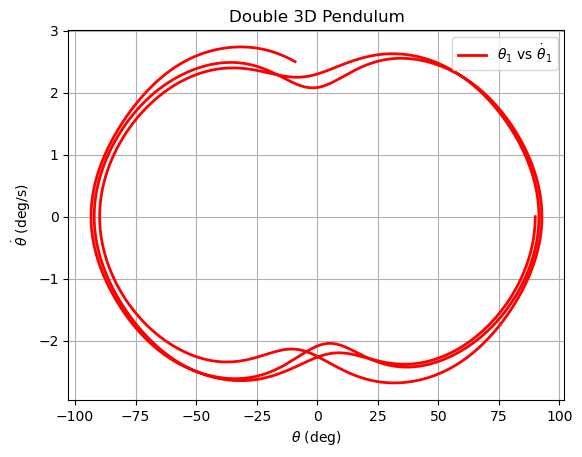

In [18]:
plt.plot(theta1,  theta1_d, 'r', lw=2, label=r'$\theta_1$ vs $\dot \theta_1$')
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()

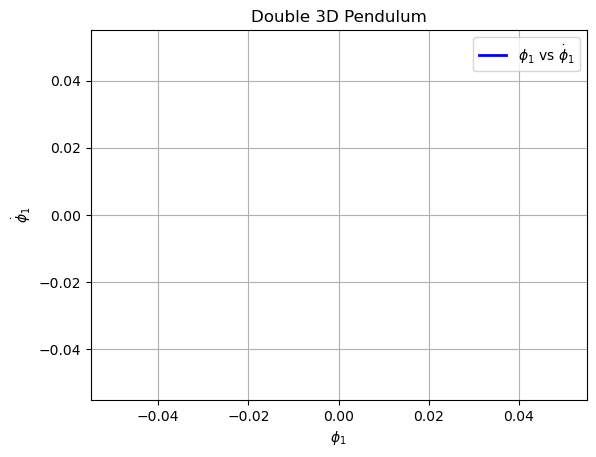

In [19]:
plt.plot(phi1_ans,  phi1_d_ans, 'b', lw=2, label=r'$\phi_1$ vs $\dot \phi_1$')
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\dot \phi_1$')
plt.grid()
plt.show()

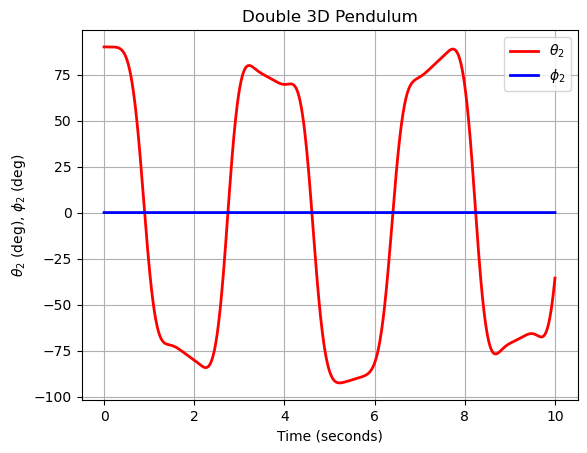

In [20]:
plt.plot(t,  theta2, 'r', lw=2, label=r'$\theta_2$')
plt.plot(t, phi2_ans, 'b', lw=2, label=r'$ \phi_2$') 
plt.title('Double 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta_2$ (deg), $\phi_2$ (deg)')
plt.grid()
plt.show()

In [21]:
def get_pos(the1, the2, phi1, phi2, L1, L2):
    return (x1_f(the1, the2, phi1, phi2, L1, L2),
            y1_f(the1, the2, phi1, phi2, L1, L2),
            z1_f(the1, the2, phi1, phi2, L1, L2),
            x2_f(the1, the2, phi1, phi2, L1, L2),
            y2_f(the1, the2, phi1, phi2, L1, L2),
            z2_f(the1, the2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_pos(ans.T[0], ans.T[1], ans.T[2], ans.T[3], L1, L2)
np.save('./data/double3Dpen', np.array([x1,y1,z1,x2,y2,z2]))

In [22]:
x1, y1, z1, x2, y2, z2 = get_pos(ans2.T[0], ans2.T[1], ans2.T[2], ans2.T[3], L1, L2)
np.save('./data/double3Dpen2', np.array([x1,y1,z1,x2,y2,z2]))

In [23]:
x1, y1, z1, x2, y2, z2 = get_pos(ans3.T[0], ans3.T[1], ans3.T[2], ans3.T[3], L1, L2)
np.save('./data/double3Dpen3', np.array([x1,y1,z1,x2,y2,z2]))

In [24]:
x1

array([1.73205081, 1.73503427, 1.73798428, ..., 0.        , 0.        ,
       0.        ])